In [442]:
## Install the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline




In [443]:
import numpy as np
from scipy.stats import mode

class KNearestNeighborsClassifier:
    def __init__(self, K):
        self.K = K  

    def fit(self, X_train, y_train):
        # Store the training data
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def predict(self, X_test):
        # Predict labels for the test set
        X_test = np.array(X_test)
        y_pred = np.zeros(X_test.shape[0], dtype=int)

        for i in range(X_test.shape[0]):
            test_instance = X_test[i]
            neighbors = self._find_neighbors(test_instance)
            
            mode_result = mode(neighbors)  # Most frequent class
            most_frequent_class = mode_result[0]
            y_pred[i] = most_frequent_class

        return y_pred

    def predict_proba(self, X_test):
        X_test = np.array(X_test)
        probas = np.zeros((X_test.shape[0], len(np.unique(self.y_train))))  # One column for each class
        
        for i in range(X_test.shape[0]):
            test_instance = X_test[i]
            neighbors = self._find_neighbors(test_instance)
            
            # Calculate the frequency of each class in the neighbors
            unique_classes, counts = np.unique(neighbors, return_counts=True)
            
            # Convert counts to probabilities by dividing by K (number of neighbors)
            probas[i, unique_classes] = counts / self.K

        return probas

    def _find_neighbors(self, test_instance):
        # Compute the Euclidean distance between test_instance and all training samples
        distances = np.linalg.norm(self.X_train - test_instance, axis=1)
        
        # Get the indices of the K nearest neighbors
        nearest_indices = np.argsort(distances)[:self.K]
        
        # Get the class labels of the K nearest neighbors
        neighbors = self.y_train[nearest_indices]
        return neighbors


In [444]:
df = pd.read_csv('dataset.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,LP002945,Male,Yes,0,Graduate,Yes,9963,0.0,180.0,360.0,1.0,Rural,Y
599,LP002948,Male,Yes,2,Graduate,No,5780,0.0,192.0,360.0,1.0,Urban,Y
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
601,LP002950,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y


In [445]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [446]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
598,LP002945,Male,Yes,0,Graduate,Yes,9963,0.0,180.0,360.0,1.0,Rural,Y
599,LP002948,Male,Yes,2,Graduate,No,5780,0.0,192.0,360.0,1.0,Urban,Y
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
601,LP002950,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y
602,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y


In [447]:
df.shape

(603, 13)

In [448]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [449]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            603 non-null    object 
 1   Gender             590 non-null    object 
 2   Married            600 non-null    object 
 3   Dependents         588 non-null    object 
 4   Education          603 non-null    object 
 5   Self_Employed      571 non-null    object 
 6   ApplicantIncome    603 non-null    int64  
 7   CoapplicantIncome  603 non-null    float64
 8   LoanAmount         582 non-null    float64
 9   Loan_Amount_Term   589 non-null    float64
 10  Credit_History     553 non-null    float64
 11  Property_Area      603 non-null    object 
 12  Loan_Status        603 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 61.4+ KB


In [450]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

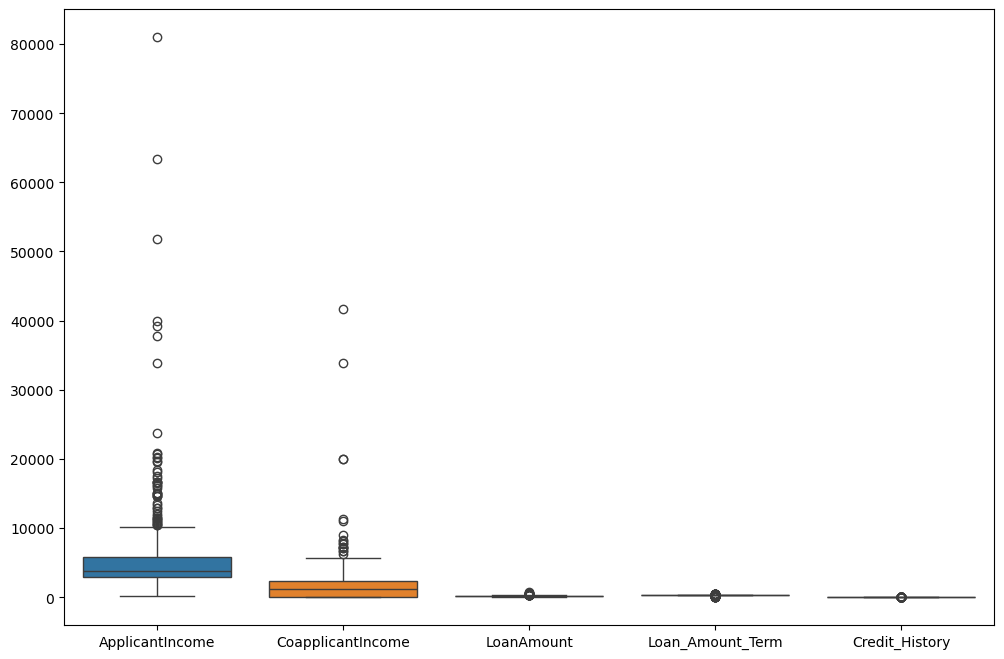

In [451]:
## Checking the outliers

plt.figure(figsize=(12,8))
sns.boxplot(data = df)

In [452]:
## Fill the null values of numerical datatype
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())



In [453]:
## Fill the null values of object datatype
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

In [454]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [455]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame

categorical_columns = df.select_dtypes(include=['object']).columns

label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = df[column].fillna(df[column].mode()[0])  
    df[column] = le.fit_transform(df[column].astype(str))  
    label_encoders[column] = le  

knn_imputer = KNNImputer(n_neighbors=2)  

df = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)

for column, le in label_encoders.items():
    df[column] = le.inverse_transform(df[column].astype(int))

print(df)


      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
598  LP002945    Male     Yes          0      Graduate           Yes   
599  LP002948    Male     Yes          2      Graduate            No   
600  LP002949  Female      No         3+      Graduate            No   
601  LP002950    Male     Yes          0  Not Graduate            No   
602  LP002953    Male     Yes         3+      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849.0                0.0       127.0           

In [456]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Number of people who took loan by gender
Gender
Male      494
Female    109
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

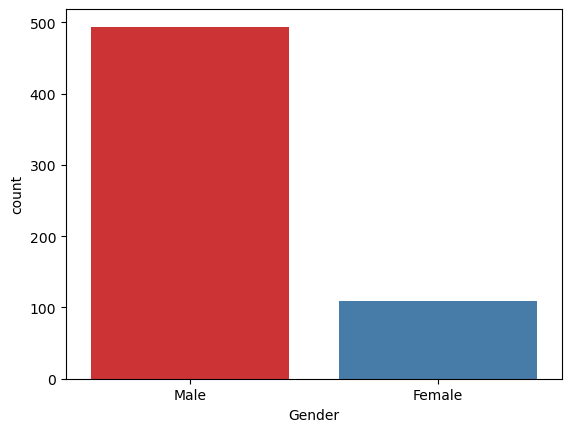

In [457]:
print('Number of people who took loan by gender')
print(df['Gender'].value_counts())
sns.countplot(x='Gender',data = df, palette='Set1')

Number of people who took loan by Married
Married
Yes    393
No     210
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

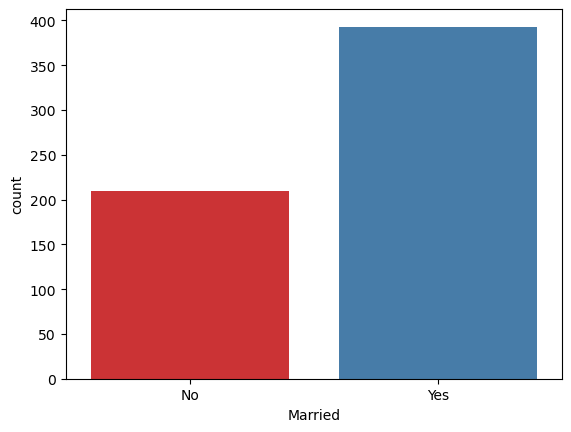

In [458]:
print('Number of people who took loan by Married')
print(df['Married'].value_counts())
sns.countplot(x='Married',data = df, palette='Set1')

Number of people who took loan by Education
Education
Graduate        471
Not Graduate    132
Name: count, dtype: int64


<Axes: xlabel='Education', ylabel='count'>

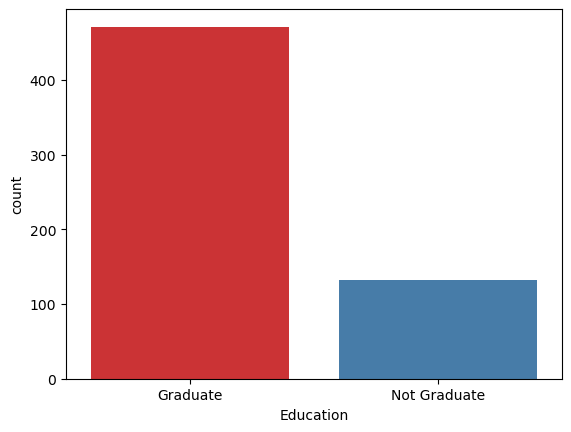

In [459]:
print('Number of people who took loan by Education')
print(df['Education'].value_counts())
sns.countplot(x='Education',data = df, palette='Set1')

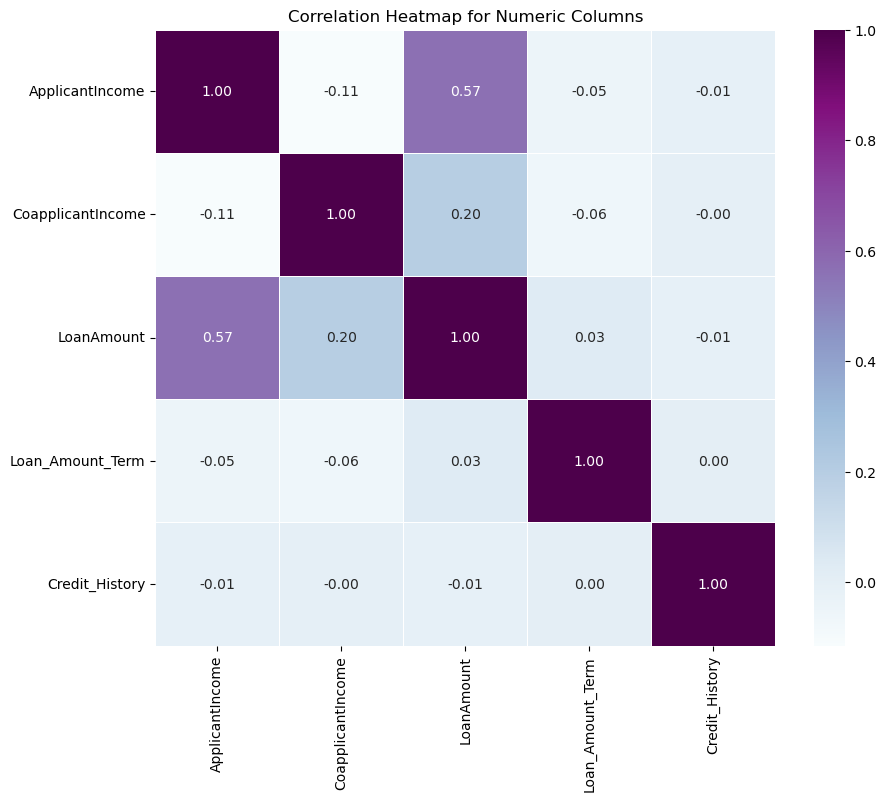

In [460]:
df_numeric = df.select_dtypes(include=['number'])

corr = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='BuPu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Numeric Columns')
plt.show()

In [461]:
corr = df_numeric.corr()
corr


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.114961,0.566839,-0.048844,-0.014765
CoapplicantIncome,-0.114961,1.000000,0.196236,-0.059049,-0.003468
LoanAmount,0.566839,0.196236,1.000000,0.031716,-0.010788
Loan_Amount_Term,-0.048844,-0.059049,0.031716,1.000000,0.004580
Credit_History,-0.014765,-0.003468,-0.010788,0.004580,1.000000


In [462]:

df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,127.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y,6000.0


<Axes: xlabel='ApplicantIncomelog', ylabel='Density'>

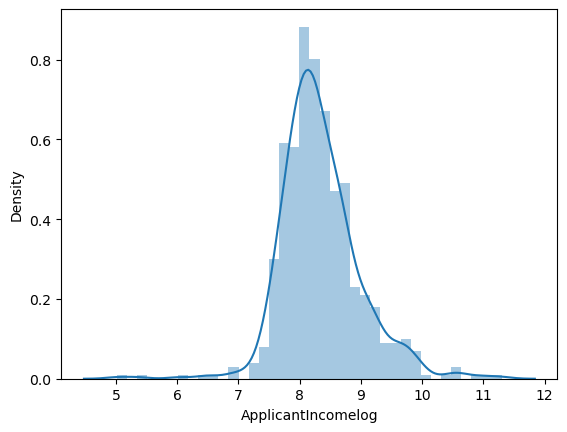

In [463]:
## Apply Log Transformation

df['ApplicantIncomelog'] = np.log(df['ApplicantIncome'] + 1)
sns.distplot(df['ApplicantIncomelog'])

In [464]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomelog
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,127.0,360.0,1.0,Urban,Y,5849.0,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681


<Axes: xlabel='LoanAmountlog', ylabel='Density'>

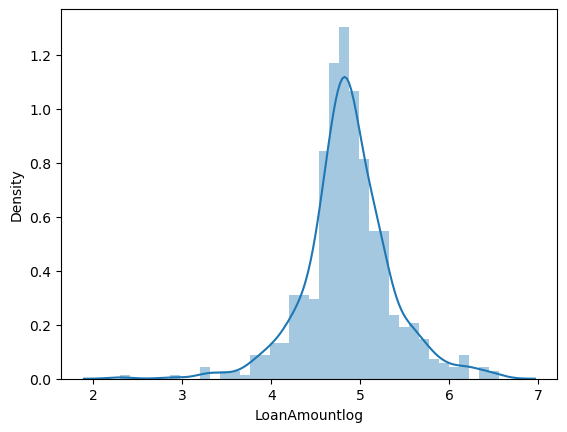

In [465]:

df['LoanAmountlog'] = np.log(df['LoanAmount'] + 1)
sns.distplot(df['LoanAmountlog'])

<Axes: xlabel='Loan_Amount_Term_log', ylabel='Density'>

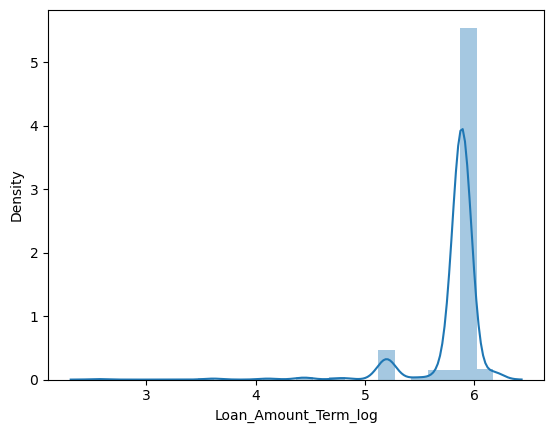

In [466]:

df['Loan_Amount_Term_log'] = np.log(df['Loan_Amount_Term'] + 1)
sns.distplot(df['Loan_Amount_Term_log'])

<Axes: xlabel='Total_Income_log', ylabel='Density'>

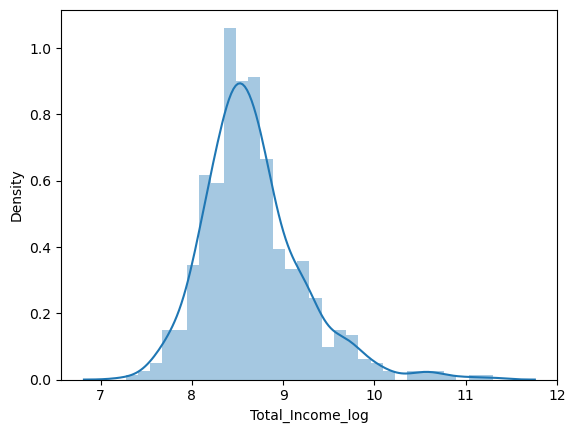

In [467]:

df['Total_Income_log'] = np.log(df['Total_Income'] + 1)
sns.distplot(df['Total_Income_log'])

In [468]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,127.0,360.0,1.0,Urban,Y,5849.0,8.674197,4.852030,5.888878,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327,4.859812,5.888878,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701,4.204693,5.888878,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094,4.795791,5.888878,8.505525
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681,4.955827,5.888878,8.699681


In [469]:
## drop unnecessary columns
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income','Loan_ID']
df = df.drop(columns = cols, axis = 1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.852030,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


In [470]:
## Encoding Technique : Label Encoding, One Hot Encoding

from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Married','Education','Dependents','Self_Employed','Property_Area','Loan_Status']
le =  LabelEncoder()
for col in cols:
  df[col] =  le.fit_transform(df[col])

In [471]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log
0,1,0,0,0,0,1.0,2,1,8.674197,4.852030,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681


In [472]:
df.dtypes

Gender                    int32
Married                   int32
Dependents                int32
Education                 int32
Self_Employed             int32
Credit_History          float64
Property_Area             int32
Loan_Status               int32
ApplicantIncomelog      float64
LoanAmountlog           float64
Loan_Amount_Term_log    float64
Total_Income_log        float64
dtype: object

In [473]:

X = df.drop(columns = ['Loan_Status'],axis = 1)
y = df['Loan_Status']

In [474]:
X

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log
0,1,0,0,0,0,1.000000,2,8.674197,4.852030,5.888878,8.674197
1,1,1,1,0,0,1.000000,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.000000,2,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.000000,2,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.000000,2,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...
598,1,1,0,0,1,1.000000,0,9.206734,5.198497,5.888878,9.206734
599,1,1,2,0,0,1.000000,2,8.662332,5.262690,5.888878,8.662332
600,0,0,3,0,0,0.840868,2,6.033086,5.860786,5.198497,10.647423
601,1,1,0,1,0,1.000000,0,7.970740,5.049856,5.888878,8.645938


In [475]:
y

0      1
1      0
2      1
3      1
4      1
      ..
598    1
599    1
600    0
601    1
602    1
Name: Loan_Status, Length: 603, dtype: int32

In [476]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [477]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)


In [478]:
df['Loan_Status'].value_counts()

Loan_Status
1    413
0    190
Name: count, dtype: int64

In [479]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [480]:
from imblearn.over_sampling import RandomOverSampler

In [481]:
oversample = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversample.fit_resample(X,y)

df_resampled = pd.concat([pd.DataFrame(X_resampled,columns=X.columns),pd.Series(y_resampled,name="Loan_status")],axis=1)

In [482]:
X_resampled

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log
0,1,0,0,0,0,1.0,2,8.674197,4.852030,5.888878,8.674197
1,1,1,1,0,0,1.0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...
821,0,1,0,1,0,0.0,1,7.673223,5.187386,5.888878,8.591744
822,1,1,1,0,0,0.0,1,8.035926,4.804021,5.888878,8.382518
823,1,1,0,1,0,0.0,2,7.805882,5.204007,5.888878,8.473868
824,1,0,0,0,0,1.0,0,8.668368,5.743003,5.888878,9.157151


In [483]:
y_resampled

0      1
1      0
2      1
3      1
4      1
      ..
821    0
822    0
823    0
824    0
825    0
Name: Loan_Status, Length: 826, dtype: int32

In [484]:
y_resampled.value_counts()

Loan_Status
1    413
0    413
Name: count, dtype: int64

                        Gender   Married  Dependents  Education  \
Gender                1.000000  0.355143    0.123830   0.044642   
Married               0.355143  1.000000    0.263020   0.019933   
Dependents            0.123830  0.263020    1.000000   0.015805   
Education             0.044642  0.019933    0.015805   1.000000   
Self_Employed         0.039801  0.036011    0.077840  -0.004800   
Credit_History        0.016166 -0.014656   -0.060922  -0.123445   
Property_Area        -0.081351 -0.004856    0.028942  -0.062591   
ApplicantIncomelog    0.160628  0.036751    0.008894  -0.166643   
LoanAmountlog         0.108502  0.123836    0.179848  -0.164044   
Loan_Amount_Term_log -0.001267 -0.030158   -0.114102  -0.025112   
Total_Income_log      0.128225  0.100535    0.150278  -0.225039   
Loan_status           0.069024  0.107725   -0.047616  -0.085986   

                      Self_Employed  Credit_History  Property_Area  \
Gender                     0.039801        0.016166      -

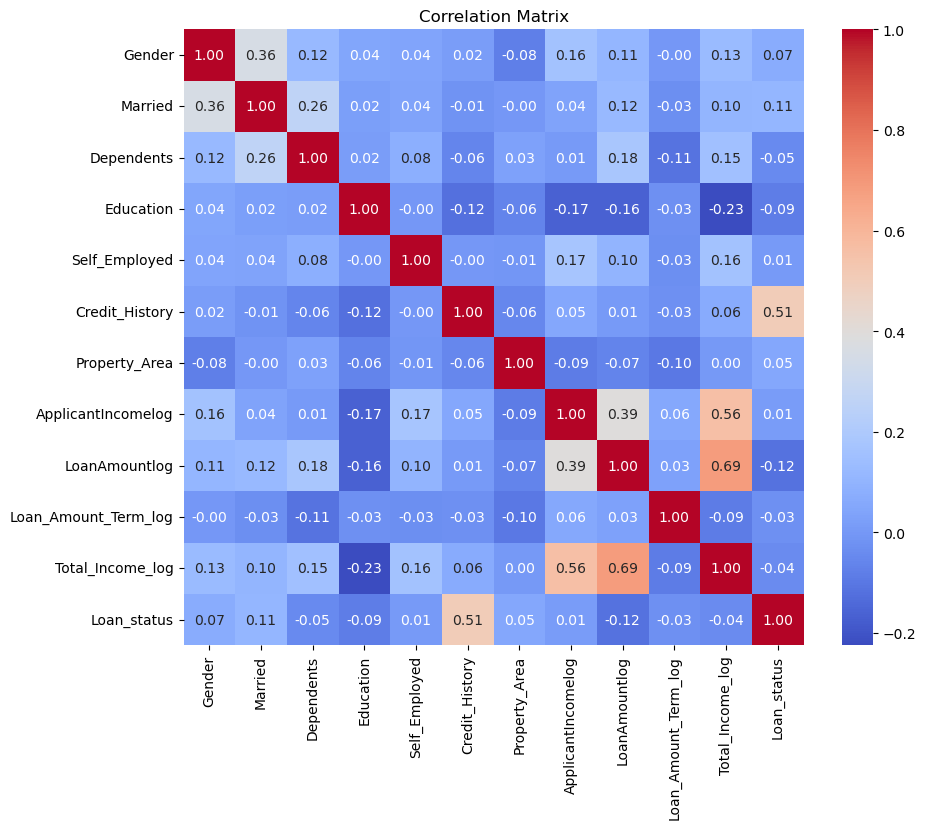

In [485]:
correlation_matrix = df_resampled.corr()

print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [486]:
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(X_resampled,y_resampled,test_size = 0.25,random_state=42)

In [487]:
model = RandomForestClassifier()
model.fit(X_resampled_train,y_resampled_train)
y_pred_rf = model.predict(X_resampled_test)
accuracy_1 = accuracy_score(y_resampled_test,y_pred_rf)
print("Accuracy score of Random Forest: ", accuracy_1*100)

Accuracy score of Random Forest:  86.47342995169082


In [488]:
from sklearn.metrics import accuracy_score

model_2 = KNearestNeighborsClassifier(K=1)

# Fit the model on the training data
model_2.fit(X_resampled_train, y_resampled_train)

# Predict the labels for the test data
y_pred_knn = model_2.predict(X_resampled_test)

accuracy_2 = accuracy_score(y_resampled_test, y_pred_knn)

print(f"Accuracy of KNN: {accuracy_2 * 100:.2f}%")


Accuracy of KNN: 81.16%


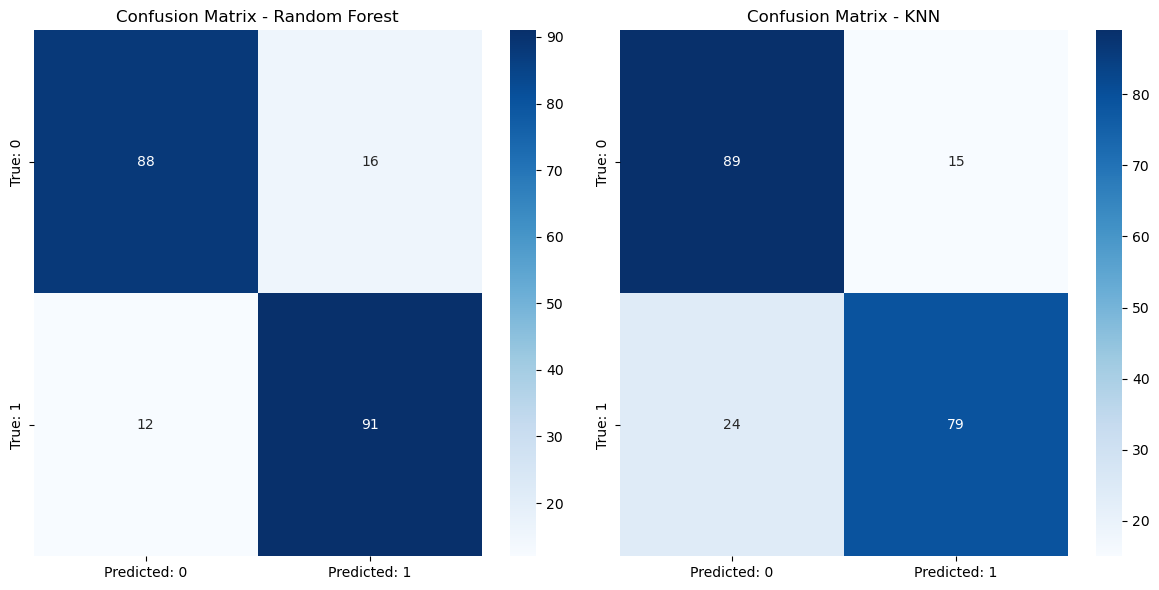

In [489]:
cm_rf = confusion_matrix(y_resampled_test, y_pred_rf)
cm_knn = confusion_matrix(y_resampled_test, y_pred_knn)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: 0', 'Predicted: 1'], yticklabels=['True: 0', 'True: 1'], ax=axes[0])
axes[0].set_title('Confusion Matrix - Random Forest')
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: 0', 'Predicted: 1'], yticklabels=['True: 0', 'True: 1'], ax=axes[1])
axes[1].set_title('Confusion Matrix - KNN')

# Show the plot
plt.tight_layout()
plt.show()

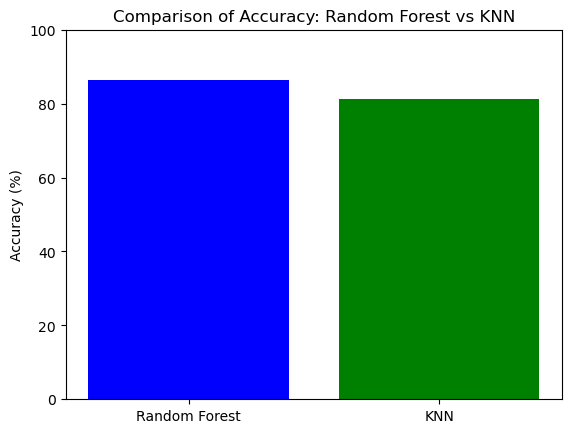

In [490]:
models = ['Random Forest', 'KNN']
accuracies = [accuracy_1*100, accuracy_2*100]

plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Accuracy: Random Forest vs KNN')
plt.ylim(0, 100)  

plt.show()

In [491]:
from sklearn.metrics import classification_report 

report = classification_report(y_resampled_test, y_pred_rf)
print(f"Classification Report For Random Forest:\n{report}\n")

report_2 = classification_report(y_resampled_test, y_pred_knn)

print(f"Classification Report For KNN:\n{report_2}\n")






Classification Report For Random Forest:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       104
           1       0.85      0.88      0.87       103

    accuracy                           0.86       207
   macro avg       0.87      0.86      0.86       207
weighted avg       0.87      0.86      0.86       207


Classification Report For KNN:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       104
           1       0.84      0.77      0.80       103

    accuracy                           0.81       207
   macro avg       0.81      0.81      0.81       207
weighted avg       0.81      0.81      0.81       207




In [492]:
df_resampled

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log,Loan_status
0,1,0,0,0,0,1.0,2,8.674197,4.852030,5.888878,8.674197,1
1,1,1,1,0,0,1.0,0,8.430327,4.859812,5.888878,8.714732,0
2,1,1,0,0,1,1.0,2,8.006701,4.204693,5.888878,8.006701,1
3,1,1,0,1,0,1.0,2,7.857094,4.795791,5.888878,8.505525,1
4,1,0,0,0,0,1.0,2,8.699681,4.955827,5.888878,8.699681,1
...,...,...,...,...,...,...,...,...,...,...,...,...
821,0,1,0,1,0,0.0,1,7.673223,5.187386,5.888878,8.591744,0
822,1,1,1,0,0,0.0,1,8.035926,4.804021,5.888878,8.382518,0
823,1,1,0,1,0,0.0,2,7.805882,5.204007,5.888878,8.473868,0
824,1,0,0,0,0,1.0,0,8.668368,5.743003,5.888878,9.157151,0


In [493]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder



raw_data = {
    'Gender': ['Female'],  
    'Married': ['No'],  
    'Dependents': [0],  
    'Education': ['Graduate'],  
    'Self_Employed': ['Yes'],  
    'Credit_History': [1], 
    'Property_Area': ['Urban'],  
    'ApplicantIncome': [351000],
    'LoanAmount': [76000],
    'Loan_Amount_Term':[360],  
    'Total_Income': [58000],  
}



new_df = pd.DataFrame(raw_data)

new_df['ApplicantIncomelog'] = np.log(new_df['ApplicantIncome'])
new_df['LoanAmountlog'] = np.log(new_df['LoanAmount'])
new_df['Loan_Amount_Term_log'] = np.log(new_df['Loan_Amount_Term'])
new_df['Total_Income_log'] = np.log(new_df['Total_Income'])



le = LabelEncoder()

cols_to_encode = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']



for col in cols_to_encode:
    new_df[col] = le.fit_transform(new_df[col])

final_df = new_df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 
                    'Credit_History', 'Property_Area', 'ApplicantIncomelog', 
                    'LoanAmountlog', 'Loan_Amount_Term_log', 'Total_Income_log']]

probability = model.predict_proba(final_df)

approval_probability = probability[0][1]

if approval_probability >= 0.5: 
    print(f"Loan Approval Prediction: Approved (Probability: {approval_probability * 100:.2f}%)")
else:
    print(f"Loan Approval Prediction: Not Approved (Probability: {approval_probability * 100:.2f}%)")



Loan Approval Prediction: Not Approved (Probability: 42.00%)


In [494]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder



raw_data = {
    'Gender': ['Female'],  
    'Married': ['No'],  
    'Dependents': [0],  
    'Education': ['Graduate'],  
    'Self_Employed': ['Yes'],  
    'Credit_History': [1], 
    'Property_Area': ['Urban'],  
    'ApplicantIncome': [351000],
    'LoanAmount': [76000],
    'Loan_Amount_Term':[360],  
    'Total_Income': [58000],  
}



new_df = pd.DataFrame(raw_data)

new_df['ApplicantIncomelog'] = np.log(new_df['ApplicantIncome'])
new_df['LoanAmountlog'] = np.log(new_df['LoanAmount'])
new_df['Loan_Amount_Term_log'] = np.log(new_df['Loan_Amount_Term'])
new_df['Total_Income_log'] = np.log(new_df['Total_Income'])



le = LabelEncoder()

cols_to_encode = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']



for col in cols_to_encode:
    new_df[col] = le.fit_transform(new_df[col])

final_df = new_df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 
                    'Credit_History', 'Property_Area', 'ApplicantIncomelog', 
                    'LoanAmountlog', 'Loan_Amount_Term_log', 'Total_Income_log']]

probability = model_2.predict_proba(final_df)

approval_probability = probability[0][1]

if approval_probability >= 0.5: 
    print(f"Loan Approval Prediction: Approved (Probability: {approval_probability * 100:.2f}%)")
else:
    print(f"Loan Approval Prediction: Not Approved (Probability: {approval_probability * 100:.2f}%)")



Loan Approval Prediction: Not Approved (Probability: 0.00%)


In [495]:
new_unseen_data = pd.read_csv('unseen_data.csv')
new_unseen_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002958,Male,No,0,Graduate,No,3676,4301,172,360,1,Rural,Y
1,LP002959,Female,Yes,1,Graduate,No,12000,0,496,360,1,Semiurban,Y
2,LP002960,Male,Yes,0,Not Graduate,No,2400,3800,4000,180,1,Urban,N
3,LP002961,Male,Yes,1,Graduate,No,3400,2500,173,360,1,Semiurban,Y
4,LP002964,Male,Yes,2,Not Graduate,No,3987,1411,157,360,1,Rural,Y
5,LP002974,Male,Yes,0,Graduate,No,3232,1950,108,360,1,Rural,Y
6,LP002978,Female,No,0,Graduate,No,2900,0,71,360,1,Rural,Y
7,LP002979,Male,Yes,3+,Graduate,No,4106,0,40,180,1,Rural,Y
8,LP002983,Male,Yes,1,Graduate,No,8072,240,253,360,1,Urban,Y
9,LP002984,Male,Yes,2,Graduate,No,7583,0,187,360,1,Urban,Y


In [496]:
y_new = new_unseen_data['Loan_Status']
y_new=y_new.map({'Y':1,'N':0})
y_new

0     1
1     1
2     0
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    0
Name: Loan_Status, dtype: int64

In [497]:
x_new = new_unseen_data.drop(columns=['Loan_Status','Loan_ID'])
x_new['Total_Income']=x_new['ApplicantIncome']+x_new['CoapplicantIncome']
x_new.drop(columns=['CoapplicantIncome'],inplace=True)


In [498]:
x_new['ApplicantIncomelog'] = np.log(x_new['ApplicantIncome'])
x_new['LoanAmountlog'] = np.log(x_new['LoanAmount'])
x_new['Loan_Amount_Term_log'] = np.log(x_new['Loan_Amount_Term'])
x_new['Total_Income_log'] = np.log(x_new['Total_Income'])


In [499]:
x_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log
0,Male,No,0,Graduate,No,3676,172,360,1,Rural,7977,8.209580,5.147494,5.886104,8.984318
1,Female,Yes,1,Graduate,No,12000,496,360,1,Semiurban,12000,9.392662,6.206576,5.886104,9.392662
2,Male,Yes,0,Not Graduate,No,2400,4000,180,1,Urban,6200,7.783224,8.294050,5.192957,8.732305
3,Male,Yes,1,Graduate,No,3400,173,360,1,Semiurban,5900,8.131531,5.153292,5.886104,8.682708
4,Male,Yes,2,Not Graduate,No,3987,157,360,1,Rural,5398,8.290794,5.056246,5.886104,8.593784
5,Male,Yes,0,Graduate,No,3232,108,360,1,Rural,5182,8.080856,4.682131,5.886104,8.552946
6,Female,No,0,Graduate,No,2900,71,360,1,Rural,2900,7.972466,4.262680,5.886104,7.972466
7,Male,Yes,3+,Graduate,No,4106,40,180,1,Rural,4106,8.320205,3.688879,5.192957,8.320205
8,Male,Yes,1,Graduate,No,8072,253,360,1,Urban,8312,8.996157,5.533389,5.886104,9.025456
9,Male,Yes,2,Graduate,No,7583,187,360,1,Urban,7583,8.933664,5.231109,5.886104,8.933664


In [500]:
x_new.drop(columns=['ApplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income'],inplace=True)

In [501]:
cols_to_encode = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area','Dependents']

for col in cols_to_encode:
    x_new[col] = le.fit_transform(x_new[col])

In [502]:
x_new

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log
0,1,0,0,0,0,1,0,8.209580,5.147494,5.886104,8.984318
1,0,1,1,0,0,1,1,9.392662,6.206576,5.886104,9.392662
2,1,1,0,1,0,1,2,7.783224,8.294050,5.192957,8.732305
3,1,1,1,0,0,1,1,8.131531,5.153292,5.886104,8.682708
4,1,1,2,1,0,1,0,8.290794,5.056246,5.886104,8.593784
5,1,1,0,0,0,1,0,8.080856,4.682131,5.886104,8.552946
6,0,0,0,0,0,1,0,7.972466,4.262680,5.886104,7.972466
7,1,1,3,0,0,1,0,8.320205,3.688879,5.192957,8.320205
8,1,1,1,0,0,1,2,8.996157,5.533389,5.886104,9.025456
9,1,1,2,0,0,1,2,8.933664,5.231109,5.886104,8.933664


In [503]:
probabilities = model.predict_proba(x_new)
predictions = (probabilities[:, 1] >= 0.5).astype(int)  
predictions



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [504]:
probabilities_2 = model_2.predict_proba(x_new)
predictions_2 = (probabilities[:, 1] >= 0.5).astype(int)  
predictions_2



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [505]:
accuracy = accuracy_score(y_new, predictions)
conf_matrix = confusion_matrix(y_new, predictions)
class_report = classification_report(y_new, predictions)

In [506]:
print(f"Accuracy of Random Forset in unseen data : {accuracy * 100:.2f}%")
print("Confusion Matrix in unseen data:\n", conf_matrix)
print("Classification Report in unseen data:\n", class_report)

Accuracy of Random Forset in unseen data : 90.91%
Confusion Matrix in unseen data:
 [[1 1]
 [0 9]]
Classification Report in unseen data:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.90      1.00      0.95         9

    accuracy                           0.91        11
   macro avg       0.95      0.75      0.81        11
weighted avg       0.92      0.91      0.90        11



In [507]:
accuracy_2 = accuracy_score(y_new, predictions_2)
conf_matrix_2 = confusion_matrix(y_new, predictions_2)
class_report_2 = classification_report(y_new, predictions_2)

In [508]:
print(f"Accuracy of Random Forset in unseen data : {accuracy_2 * 100:.2f}%")
print("Confusion Matrix in unseen data:\n", conf_matrix_2)
print("Classification Report in unseen data:\n", class_report_2)

Accuracy of Random Forset in unseen data : 90.91%
Confusion Matrix in unseen data:
 [[1 1]
 [0 9]]
Classification Report in unseen data:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.90      1.00      0.95         9

    accuracy                           0.91        11
   macro avg       0.95      0.75      0.81        11
weighted avg       0.92      0.91      0.90        11

